In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature
import calendar

In [ ]:
path = '/scratch/aachar5/clim680_dataset/'
fname = 'adaptor.mars.internal-1663965452.3528512-14052-2-b47b40ba-074e-4000-baa7-e70764531a59.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 264)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2021-12-01
Data variables:
    t          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-09-23 20:37:36 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [ ]:
ds_t=ds.groupby('time.month').mean()
ds_t

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, month: 12)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t          (month, latitude, longitude) float32 249.6 249.6 ... 263.6 263.6

Text(0.5, 0.98, 'Monthly Averaged Analysis of Temperature (˚K)')

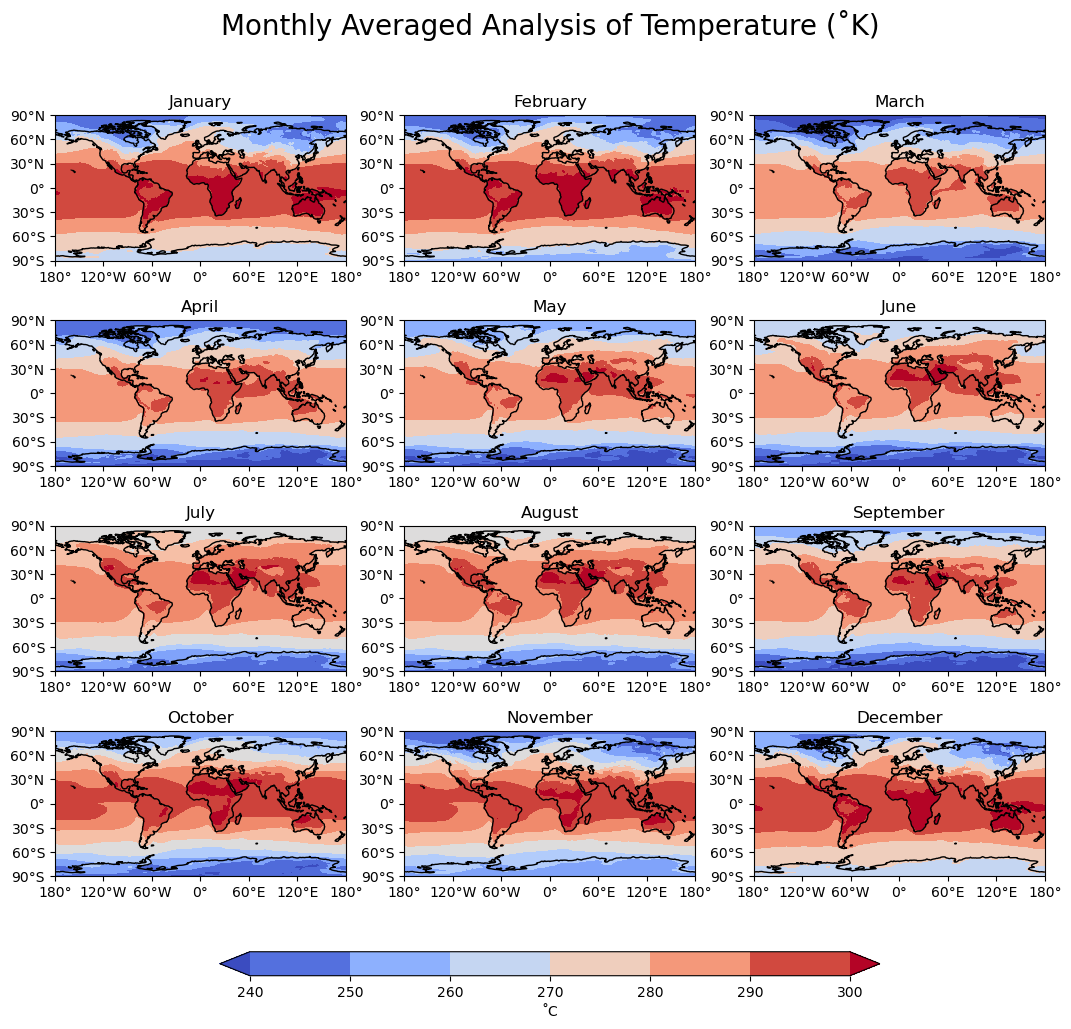

In [20]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,12))
# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,t in enumerate(ds_t['month']):
    
    # Select the season
    data=ds_t['t'].sel(month=t)

        # Add the cyclic point
    data,lons=add_cyclic_point(data,coord=ds_t['longitude'])

        # Contour plot
    cs=axs[i].contourf(lons,ds_t['latitude'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the season
    axs[i].set_title(calendar.month_name[i+1])

    # Draw the coastines for each subplot
    axs[i].coastlines()

# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.25)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='˚C')

# Add a big title at the top
plt.suptitle('Monthly Averaged Analysis of Temperature (˚K)',fontsize=20)